In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
INPUT_DIR = os.path.join("/kaggle", "input")
test_df = pd.read_csv(os.path.join(INPUT_DIR, "titanic", "test.csv"))       
train_df = pd.read_csv(os.path.join(INPUT_DIR, "titanic", "train.csv"))


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
female_surviors = train_df.loc[train_df["Sex"] == 'female']['Survived']
female_survival_rate = sum(female_surviors) / len(female_surviors)
print(female_survival_rate)

0.7420382165605095


In [6]:
male_surviors = train_df.loc[train_df["Sex"] == 'male']['Survived']
male_survival_rate = sum(male_surviors)/ len(male_surviors)
print(male_survival_rate)

0.18890814558058924


In [7]:
features = ["Pclass", "Sex"]

y = train_df["Survived"]
X = pd.get_dummies(train_df[features]) # ie 0 male: 1 female

decision_tree = DecisionTreeClassifier() # create DecisionTree
decision_tree = decision_tree.fit(X, y) # fit the data to the model 
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

[Text(167.40000000000003, 190.26, 'X[2] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(100.44000000000001, 135.9, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 1.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.062\nsamples = 94\nvalue = [3, 91]'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.145\nsamples = 76\nvalue = [6, 70]'),
 Text(133.92000000000002, 81.53999999999999, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(234.36, 135.9, 'X[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(200.88000000000002, 81.53999999999999, 'gini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(267.84000000000003, 81.53999999999999, 'X[0] <= 2.5\ngini = 0.242\nsamples = 455\nvalue = [391, 64]'),
 Text(234.36, 27.180000000000007, 'gini = 0.265\nsamples = 108\nvalue = [91, 17]'),
 Text(301.32000000000005, 27.180000000000007

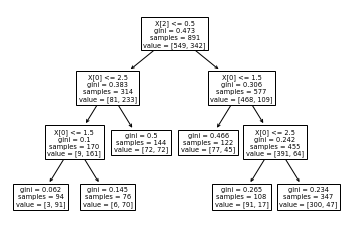

In [8]:
plot_tree(decision_tree)

In [9]:
#Predicition
X_test = pd.get_dummies(test_df[features])
predicitions = decision_tree.predict(X_test)

# save as a csv in proper format 

submission_df = pd.DataFrame({"PassengerId": test_df['PassengerId'], "Survived": predicitions})
submission_df.to_csv('submission.csv', index=False)
